In [242]:
import numpy as np
import pandas as pd
import xlrd
import os
import tarfile
from six.moves import urllib
import seaborn as sns


In [243]:
%matplotlib inline

In [244]:
# pre = os.path.dirname(os.path.realpath('__file__'))
# fname = 'DataFile1.xlsx'
# path = os.path.join(pre, fname)
# data = pd.read_excel(path)

In [245]:
data = pd.read_csv('DataFile.csv')

In [246]:
data.head()

,Range,HITF/RHTL #,Shot #,Shot Date,Program,Series,Series Test #,Desired Velocity,Actual Velocity,Delta Velocity,...,Barrel,Petal Valve,Accept / Unaccept,Reason If Unaccept,ES,Sabot Material,Sabot OD,Sabot Depth,Count,Muzzle
0,.50 Cal,RHTL 18URO 055B,1932.0,3/15/2018,URO,Europa Clipper Propulsion Module,5.1.1.4-3,7.0,7.06,0.06,...,16.0,10k 304l ss,Acceptable,NaN,#REF!,4 piece lexan rear serrations,0.4940,4.25,1.0,0.489
1,.50 Cal,18014,1931.0,3/14/2018,ISS,ISS Orbital Cygnus Service Module Shield using...,6,5.0,4.95,-0.05,...,16.0,10k 304l ss,Acceptable,NaN,#REF!,4 piece lexan rear serrations,0.4940,5.5,1.0,0.489
2,.50 Cal,18011,1930.0,3/13/2018,ISS,ISS Orbital Cygnus Service Module Shield using...,3,3.0,2.61,-0.39,...,16.0,2k brass,Unacceptable,velocity low,#REF!,4 piece lexan rear serrations,0.4935,6,1.0,0.489
3,.50 Cal,18088,1929.0,3/13/2018,VIO,MPCV ESM MDPS Mass Reduction HVI Test Program,26,7.0,6.96,-0.04,...,16.0,10k 304l ss,Acceptable,NaN,#REF!,4 piece lexan rear serrations,0.4935,5.125,1.0,0.489
4,.50 Cal,18080,1928.0,3/12/2018,VIO,MPCV ESM MDPS Mass Reduction HVI Test Program,18,7.0,6.89,-0.11,...,16.0,10k 304l ss,Acceptable,NaN,#REF!,4 piece lexan rear serrations,0.4935,6,1.0,0.489


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 25 columns):
Range                  408 non-null object
HITF/RHTL #            408 non-null object
Shot #                 408 non-null float64
Shot Date              408 non-null object
Program                407 non-null object
Series                 246 non-null object
Series Test #          245 non-null object
Desired Velocity       408 non-null float64
Actual Velocity        408 non-null float64
Delta Velocity         408 non-null float64
Powder                 408 non-null float64
Lp Mass                408 non-null float64
Projectile             408 non-null float64
Projectile Material    408 non-null object
Projectile Mass        198 non-null float64
Barrel                 408 non-null float64
Petal Valve            398 non-null object
Accept / Unaccept      404 non-null object
Reason If Unaccept     36 non-null object
ES                     408 non-null object
Sabot Material         19

In [248]:
data.drop('Count', axis=1, inplace=True)

In [249]:
data.describe()

,Shot #,Desired Velocity,Actual Velocity,Delta Velocity,Powder,Lp Mass,Projectile,Projectile Mass,Barrel,Sabot OD,Muzzle
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,198.000000,408.000000,403.000000,407.000000
mean,1727.029412,6.725417,6.705025,-0.020392,172.207941,1.779031,4.497206,0.224821,12.044118,0.658057,0.518942
std,119.331962,0.738673,0.802715,0.236318,31.474938,0.604204,2.093140,0.313196,3.377628,0.797114,0.026314
min,1521.000000,3.000000,2.610000,-2.230000,62.000000,1.004040,1.180000,0.010730,3.000000,0.000000,0.487000
25%,1623.750000,7.000000,6.880000,-0.070000,162.037500,1.251278,2.997500,0.042573,9.000000,0.500000,0.496500
50%,1727.500000,7.000000,7.000000,0.015000,171.000000,1.666995,4.200000,0.097970,12.000000,0.522500,0.520200
75%,1830.250000,7.000000,7.070000,0.080000,198.025000,2.163212,5.480000,0.278698,15.000000,0.549000,0.541800
max,1932.000000,7.060000,7.300000,0.510000,227.000000,3.891260,11.150000,1.614860,18.000000,5.725000,0.590700


In [250]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# data.hist(bins=50, figsize=(20,15))
# plt.show()

In [251]:
corr_matrix = data.corr()

corr_matrix["Actual Velocity"].sort_values(ascending=False)

Actual Velocity     1.000000
Desired Velocity    0.956366
Powder              0.754770
Delta Velocity      0.407389
Muzzle              0.149900
Lp Mass             0.068297
Sabot OD            0.050945
Projectile          0.021942
Shot #             -0.002751
Barrel             -0.039376
Projectile Mass    -0.075127
Name: Actual Velocity, dtype: float64

In [252]:



s = data["Sabot Depth"].convert_objects(convert_numeric=True).dropna()
data['sabot_od'] = pd.to_numeric(data['Sabot OD'], errors='coerce')

#pd.to_numeric(data["Sabot Depth"])


C:\Users\drodri18\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [253]:
data["Sabot Depth"] = s
data.dropna(subset=["Sabot Depth"],inplace=True)
data.dropna(subset=["sabot_od"],inplace=True)
# special = df[df.kind=='special']
# others = df[df.kind!='special']

# special = special.dropna(how='any')



In [254]:
data["Sabot_OD"] = data[(data['sabot_od']>0.4) & (data['sabot_od']<0.6)]['sabot_od']
data["Actual_Velocity"] = data[(data['Actual Velocity']>6.8) & (data['Actual Velocity']< 7.3)]['Actual Velocity']
data["Delta_Velocity"] = data[(data['Delta Velocity']> -0.17) & (data['Delta Velocity']< 0.17)]['Delta Velocity']
#data["Desired_Velocity"] = data[(data['Desired Velocity']> 6.79) & (data['Desired Velocity']< 7.1)]['Desired Velocity']
data["Desired_Velocity"] = data[data['Desired Velocity']== 7.0]['Desired Velocity']
data["Lp_Mass"] = data[data['Lp Mass']> 0.5]['Lp Mass']
data["Barrel_"] = data[(data['Barrel']!= 4) & (data['Barrel']!= 8) & (data['Barrel']!= 9) & (data['Barrel']!= 10) & (data['Barrel']!= 13) & (data['Barrel']!= 14)]['Barrel']
data.drop('Actual Velocity', axis=1,inplace=True)
data.drop('Delta Velocity', axis=1,inplace=True)
data.drop('Desired Velocity', axis=1,inplace=True)
data.drop('Lp Mass', axis=1,inplace=True)
data.drop('Sabot OD', axis=1,inplace=True)
data.drop('sabot_od', axis=1,inplace=True)
data.drop('Range', axis=1,inplace=True)
data.drop('Projectile', axis=1,inplace=True)
data.drop('Projectile Material', axis=1,inplace=True)
data.drop('Accept / Unaccept', axis=1,inplace=True)
data.drop('Reason If Unaccept ', axis=1,inplace=True)
data.drop('Shot Date', axis=1,inplace=True)
#data.drop('Barrel', axis=1,inplace=True)
data.drop('ES', axis=1,inplace=True)
data.drop('HITF/RHTL #', axis=1,inplace=True)
data.drop('Projectile Mass', axis=1,inplace=True)
data.drop('Shot #', axis=1,inplace=True)
data.drop('Program', axis=1,inplace=True)
data.drop('Series', axis=1,inplace=True)
data.drop('Series Test #', axis=1,inplace=True)
data.drop('Petal Valve', axis=1,inplace=True)
data.drop('Sabot Material', axis=1,inplace=True)
data.drop('Barrel', axis=1,inplace=True)
data.dropna(subset=["Muzzle"],inplace=True)
data.dropna(subset=["Sabot_OD"],inplace=True)
data.dropna(subset=["Actual_Velocity"],inplace=True)
data.dropna(subset=["Delta_Velocity"],inplace=True)
data.dropna(subset=["Desired_Velocity"],inplace=True)
data.dropna(subset=["Lp_Mass"],inplace=True)
data.dropna(subset=["Barrel_"],inplace=True)
data["Squeeze"] = data["Sabot_OD"] - data["Muzzle"]
data




,Powder,Sabot Depth,Muzzle,Sabot_OD,Actual_Velocity,Delta_Velocity,Desired_Velocity,Lp_Mass,Barrel_,Squeeze
0,163.0,4.250,0.4890,0.4940,7.06,0.06,7.0,1.14580,16.0,0.0050
3,167.5,5.125,0.4890,0.4935,6.96,-0.04,7.0,1.42045,16.0,0.0045
4,162.0,6.000,0.4890,0.4935,6.89,-0.11,7.0,1.14705,16.0,0.0045
5,166.8,5.250,0.4890,0.4930,7.02,0.02,7.0,1.35513,16.0,0.0040
6,158.0,6.750,0.4890,0.4930,6.91,-0.09,7.0,1.04075,16.0,0.0040
7,170.2,5.750,0.4890,0.4930,7.01,0.01,7.0,1.52006,16.0,0.0040
8,166.0,7.000,0.4890,0.4925,7.07,0.07,7.0,1.36802,16.0,0.0035
9,165.0,6.500,0.4890,0.4925,7.07,0.07,7.0,1.35366,16.0,0.0035
10,169.6,5.000,0.4890,0.4925,6.95,-0.05,7.0,1.57157,16.0,0.0035
11,159.5,4.250,0.4890,0.4925,7.15,0.15,7.0,1.02866,16.0,0.0035


In [255]:
#data.dropna(subset=["Powder-(SabotOD-Muzzle*Insertion Depth)"],inplace=True)

#sabot_od = data[(data['Sabot OD']> 0.4) & (data['Sabot OD']<0.6)]

# sabot_od1 = data[data['Sabot_od']> 0.4]
# sabot_od1
# data['Sabot OD_'] = sabot_od1
#data[['Powder','Powder-(SabotOD-Muzzle*Insertion Depth)']]

In [256]:
corr_matrix = data.corr()

corr_matrix["Actual_Velocity"].sort_values(ascending=False)

Actual_Velocity     1.000000
Delta_Velocity      1.000000
Muzzle              0.090108
Sabot_OD            0.086727
Sabot Depth         0.054591
Powder              0.041855
Squeeze             0.007030
Lp_Mass            -0.028156
Barrel_            -0.058586
Desired_Velocity         NaN
Name: Actual_Velocity, dtype: float64

In [257]:
corr_matrix = data.corr()

corr_matrix["Powder"].sort_values(ascending=False)

Powder              1.000000
Lp_Mass             0.950022
Muzzle              0.478053
Sabot_OD            0.459006
Delta_Velocity      0.041855
Actual_Velocity     0.041855
Squeeze             0.027597
Sabot Depth        -0.212100
Barrel_            -0.519065
Desired_Velocity         NaN
Name: Powder, dtype: float64

C:\Users\drodri18\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3B3AD2A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D3B4A70908>]], dtype=object)

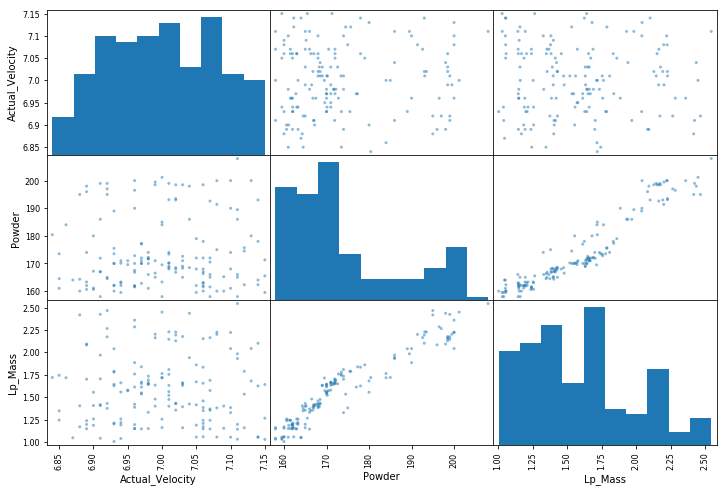

In [258]:
from pandas.tools.plotting import scatter_matrix

attributes = ["Actual_Velocity","Powder","Lp_Mass"]

scatter_matrix(data[attributes], figsize=(12,8))

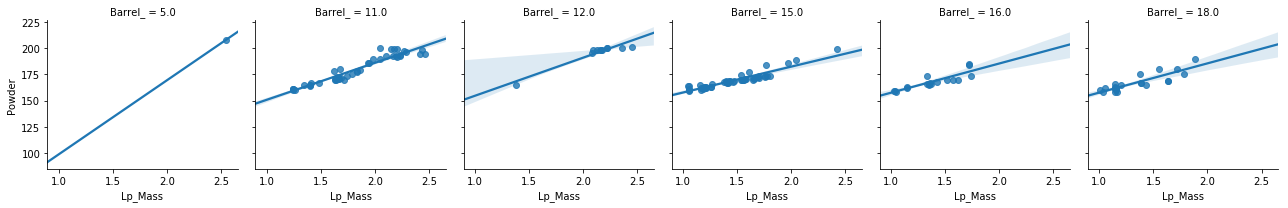

In [259]:
sns.lmplot(x='Lp_Mass', y='Powder',data=data, col='Barrel_', size=3)

In [260]:
writer = pd.ExcelWriter('CleanData.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()


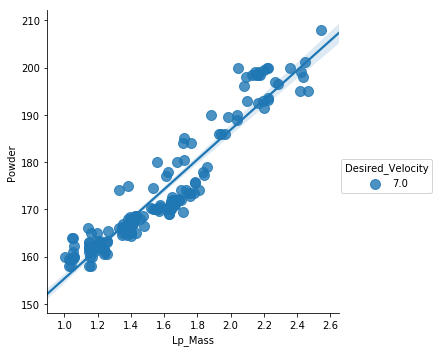

In [261]:
sns.lmplot(x='Lp_Mass', y='Powder', data=data,hue='Desired_Velocity',scatter_kws={'s':100})